## Logistic Regression

- Models the probability an object belongs to a class
- Values ranges from 0 to 1
- Can use threshold to classify into which classes a class belongs
- An S-shaped curve

$
\begin{align}
\sigma(t) = \frac{1}{1 + e^{-t}}
\end{align}
$


In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

### How does the Logistic Regression function looks like

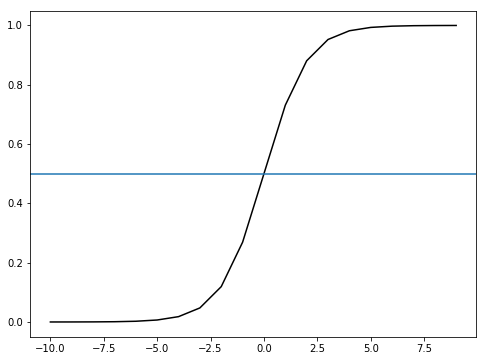

In [23]:
from matplotlib import pyplot as plt
import math

x = [i for i in range(-10, 10)]
y = [1.0/(1+math.exp(-1*i)) for i in x]

ax = plt.figure(figsize=(8, 6))
plt.plot(x, y,  color='black')
plt.axhline(0.5)
plt.show()

### Read the data and plot

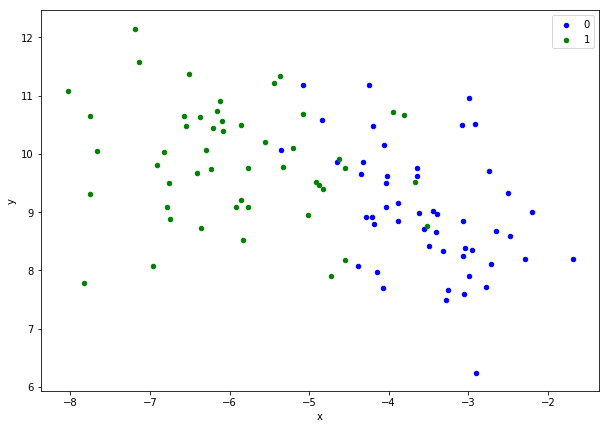

In [24]:
import pandas as pd

# Read the data
df_data = pd.read_csv('../data/2d_classification.csv')

# Plot the data
plt.rcParams['figure.figsize'] = [10, 7] # Size of the plots

colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k'}
fig, ax = plt.subplots()
grouped = df_data.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

### Another way to plot the data

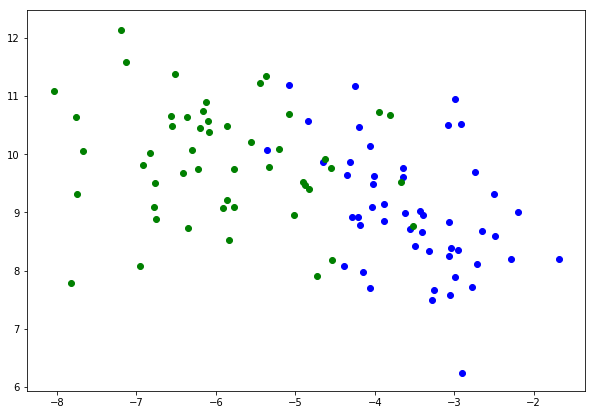

In [25]:
import pandas as pd
import numpy as np

# Read the data
df_data = pd.read_csv('../data/2d_classification.csv')

colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k'}

plt.figure()
unq_labels = np.unique(df_data['label'])
for i in unq_labels:
    df = df_data.loc[df_data['label'] == i][['x','y']]
    x = df['x']
    y = df['y']
    plt.scatter(x, y, c=colors[i], alpha=1)

### Just using some friendly variable names

In [26]:
data = df_data[['x','y']].values
label = df_data['label'].values

### Our first Logistic Regression model

In [27]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

log_regr = LogisticRegression()
log_regr.fit(data, label)
predictions = log_regr.predict(data)

df_data['pred_label'] = predictions

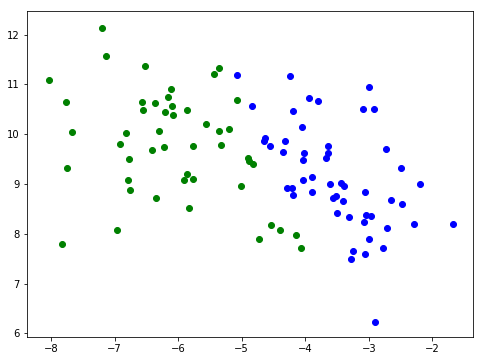

In [28]:
colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k'}

plt.figure(figsize=(8,6))
unq_labels = np.unique(predictions)
for i in unq_labels:
    df = df_data.loc[df_data['pred_label'] == i][['x','y']]
    x = df['x']
    y = df['y']
    plt.scatter(x, y, c=colors[i], alpha=1)

#### Problem with the previous approach
- When we develop model, using the complete dataset will not allow us to know the actual performance metrics
- Instead always have a test data for evaluation

<font color='red'> <h1> Go to Notebook '03a - Data Split' to know about data split and return from this point </h1> </font>

## Train-Test Splits

In [29]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.20, 
                                                                  random_state=0, stratify=None)

In [30]:
df_before_pred = pd.DataFrame(data_train, columns=['x','y'])
df_before_pred['label'] = label_train

# df_before_pred['label'] = df_before_pred['labels'].apply(lambda x:x+2)
df_before_pred_test = pd.DataFrame(data_test, columns=['x','y'])
df_before_pred_test['label'] = 4

df_before_pred = pd.concat([df_before_pred, df_before_pred_test], ignore_index=True)

__Train-test ratio of the split data__

In [31]:
print('Complete data:', data.shape)
print('Train Data:', data_train.shape, 'Test Data:', data_test.shape)

Complete data: (100, 2)
Train Data: (80, 2) Test Data: (20, 2)


__How the data is split__

In [32]:
from collections import Counter
print('Training Data split', Counter(label_train))
print('Testing Data split', Counter(label_test))

Training Data split Counter({0: 42, 1: 38})
Testing Data split Counter({1: 12, 0: 8})


#### Stratified split

In [33]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.20, 
                                                                  random_state=0, stratify=label)

print('Complete data:', data.shape)
print('Labels distribution', Counter(label))
print('Train Data:', data_train.shape, 'Test Data:', data_test.shape)

from collections import Counter
print('Training Data split', Counter(label_train))
print('Testing Data split', Counter(label_test))

Complete data: (100, 2)
Labels distribution Counter({1: 50, 0: 50})
Train Data: (80, 2) Test Data: (20, 2)
Training Data split Counter({1: 40, 0: 40})
Testing Data split Counter({1: 10, 0: 10})


### Logistic regression on the train-test stratified split

In [34]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

# Run Logistic Regression
log_regr = LogisticRegression()
log_regr.fit(data_train, label_train)
predictions = log_regr.predict(data_test)

data = np.concatenate((data_train, data_test))
label = np.concatenate((label_train, predictions))

df_train_test_pred = pd.DataFrame(data, columns=['x','y'])
df_train_test_pred['label'] = label

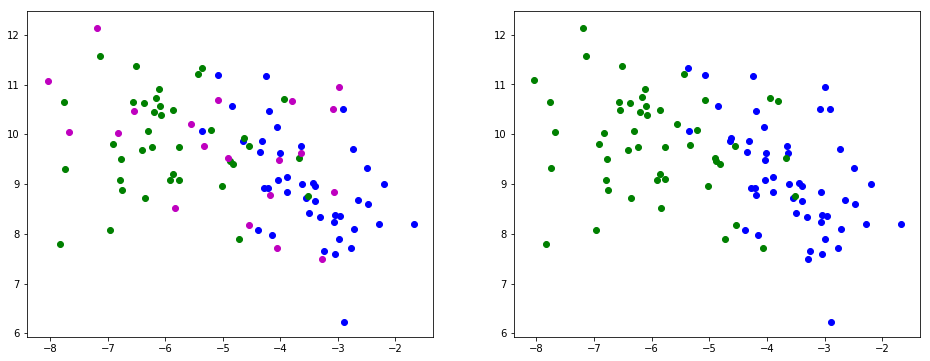

In [35]:
colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k'}

plt.figure(figsize= (16, 6))

plt.subplot(1,2,1)
unq_labels = np.unique(df_before_pred['label'])
for i in unq_labels:
    df = df_before_pred.loc[df_before_pred['label'] == i][['x','y']]
    x = df['x']
    y = df['y']
    plt.scatter(x, y, c=colors[i], alpha=1)

plt.subplot(1,2,2)
unq_labels = np.unique(df_train_test_pred['label'])
for i in unq_labels:
    df = df_train_test_pred.loc[df_train_test_pred['label'] == i][['x','y']]
    x = df['x']
    y = df['y']
    plt.scatter(x, y, c=colors[i], alpha=1)

## Find the accuracy of Test Data

In [36]:
log_regr.score(data_test, label_test)

0.85

## Find the coefficients

In [37]:
log_regr.coef_

array([[-1.78437808, -0.7594295 ]])

## Find the intercepts

In [38]:
log_regr.intercept_

array([-0.95934723])

## Overfitting and underfitting

### Train Data Accuracy

In [39]:
print('Train Error', log_regr.score(data_train, label_train))

Train Error 0.8875


### What is overfitting
- When you have a very high training error but very low test error

<img src='img/overfitting_bed.jpg'>

Image Source: Original Source unknown - but all over the internet

<img src='img/overfitting.gif'>

[Image Source](https://towardsdatascience.com/over-fitting-and-regularization-64d16100f45c)

<img src='img/overfitting_underfitting.png'>

[Image Source]()